__________________________________________________________________________________________________________________________________________________
# **ASSIGNMENT 03 - REGRESSION EXERCISE**
__________________________________________________________________________________________________________________________________________________
- Due Date: November 15th 2022
- Course: Data Analytics for Decision Making
- Master: MCSBT
- Professor: Jesús García San Luis

## **INTRODUCTION**
________________________________________________________________________________________________________________________________________________
Businesses make use of regression analysis to find patterns and trends. Business Analysts build predictions about future trends using historical data.

Regression methods can also go beyond predicting the impact on immediate revenue. Using this method, you can forecast the number of customers willing to buy a service and use that data to estimate the workforce needed to run that service. 

Most insurance companies use regression analysis to calculate the credit health of their policyholders and the probable number of claims in a certain period. 

In this exercise we will try to predict the price of houses in the Boston area given several characteristics of the house like the lot area, zoning, street type, neighborhood, etc.

__________________________________________________________________________________________________________________________________________________
### **FIRST STEPS** -> importing libraries we will be using and loading the data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model as linear_model
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, r2_score, mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats

In [2]:
# Read dataset
d = pd.read_csv('Boston_houses.csv')

## **DATA ANALYSIS**
In this section of the assignment we will go through the dataframe, analysing the most important features.

In [3]:
# Printing the whole dataset to see its shape, attributes, features and columns.
d

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Now we will analyse some of the feature more in depth and see the distribution and relationship of some features and the SalePrice. This will allow us to determine wether or not certain features are significant. 

### **0. SalePrice Analysis**
First, let's look closer to the sale price of the houses, which is the feature we are going to predict. This will give us some info about the distribution and will help us make some assumptions. 


In [4]:
d['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/pabloostos/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

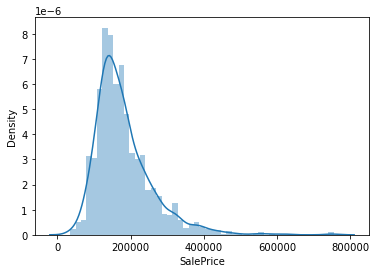

In [5]:
sns.distplot(d['SalePrice'])

Looking at the density distribution of the SalePrice we see that it does not follow the bell curve, so what we are going to do is log transforming this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid.
Log transformation is a data transformation method in which it replaces each variable x with a log(x).

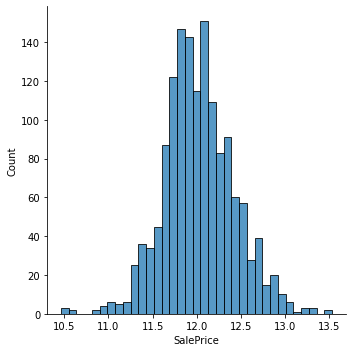

In [6]:
d['SalePrice'] = np.log(d['SalePrice'])
sns.displot(d['SalePrice'])

### **0.1. OverallQual and OverallCond**
Now, if we plot the relation between the overall quality of the house (OverallQual) and overall condition (OverallCond) and the SalePrice we can see that the results make sense. 

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

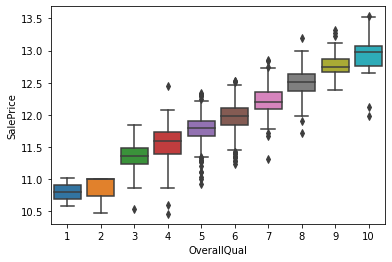

In [7]:
sns.boxplot(data=d,x='OverallQual',y='SalePrice')

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

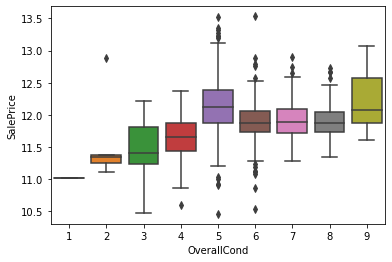

In [8]:
sns.boxplot(data=d,x='OverallCond',y='SalePrice')

### **0.2. Neighbourhood**
Relationship of the PriceSale and Neighbourhood

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

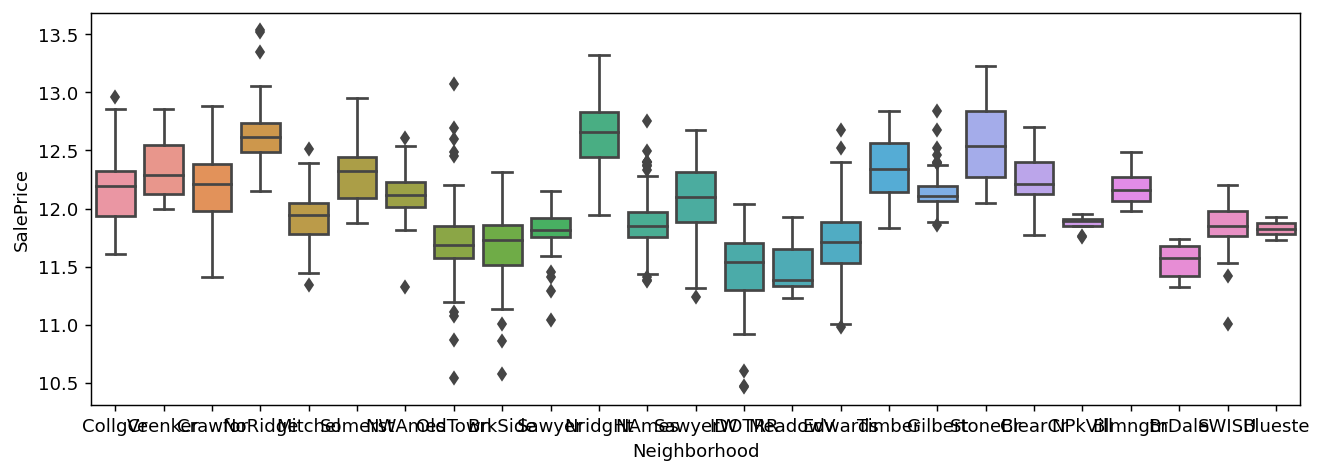

In [9]:
plt.figure(figsize=(12,4),dpi=130)
sns.boxplot(data=d,x='Neighborhood',y='SalePrice', )

Evidently, some neighborhoods have higher prices than others.

### **0.3. YearBuilt**
Relationship of the PriceSale and the year it was built

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

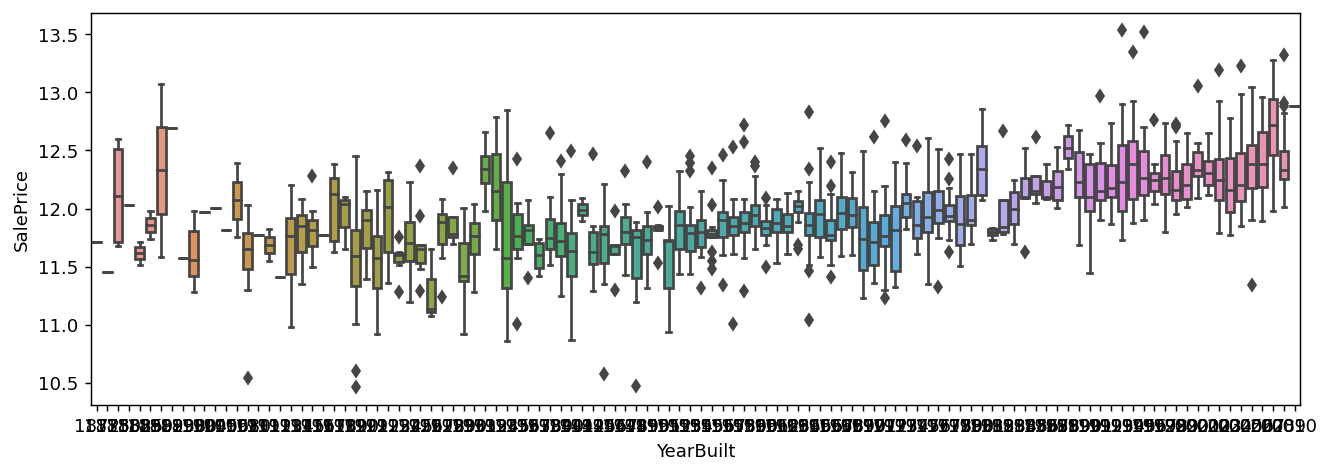

In [10]:
plt.figure(figsize=(12,4),dpi=130)
sns.boxplot(data=d,x='YearBuilt',y='SalePrice', )

### **0.4. TotalBsmtSF**
Then for example we can look at the correlation between the SalePrice and some deature of the interior of the house, for example the total square feet of basement area

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

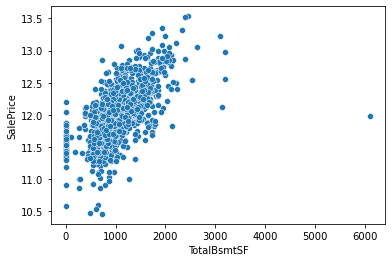

In [11]:
sns.scatterplot(data=d,x='TotalBsmtSF',y='SalePrice')

### **0.5. GrLivArea**

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

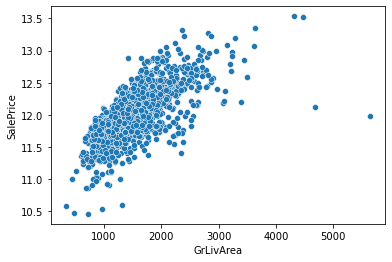

In [12]:
sns.scatterplot(data=d,x='GrLivArea',y='SalePrice')

Here there is a clear correlation between the above ground living area square feet and the SalePrice. The higher GrLivArea the higher the SalePrice. 

### **1. Correlation between features**

### **1.1. Correlations between continuous features and SalePrice**

In [13]:
d.corr()["SalePrice"].sort_values(ascending=False)[1:]

OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

### **1.2. Correlation between features**

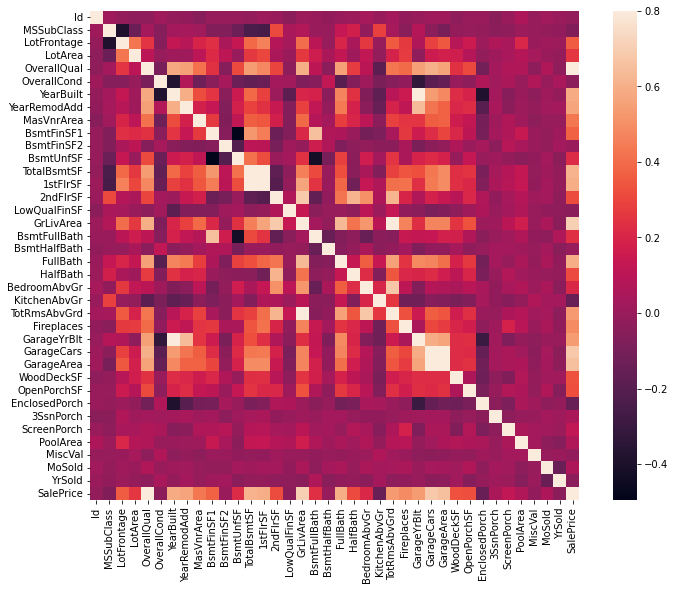

In [14]:
corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

__________________________________________________________________________________________________________________________________________________
## **DATA PREPARATION**
*This part of the assignment consists on the act of cleaning and consolidating the raw data before submitting it to analysis. Carrying out the process of validating, cleaning and augmenting the raw data is the foundation to obtain precise and significant insights from them. 
In this assignment we will recall some of the data preparation techniques seen in the first assignment and session 4 of the course.* 



In [15]:
# In the previous chunk of code we can already see its shape, but to see it more clearly: 
d.shape

(1460, 81)

Some things I'd like to highlight from these results is that the data frame contains 1460 rows and 81 columns, this means, it has 81 features for us to measure or analyse. As a consequence of the high number of features, we will have to do some serious data cleaning. There are two options, just pick a few handful of columns and do the regression with these hand picked columns (to do this we would have to analyse all the features and pick the ones we believe to be more relevant). The second option, the one I opted to perform, is narrowing down the data, by eliminating or combining some of the features. 

*Now we will see more in depth what these rows and columns contain and make a cleans so that the data can be analysed.*

- First we will look inside all rows to see if there are null values, if there are any, we will impute them. Null or missing values can be described as those values that are not stored for some variables, these values can reduce the accuracy of our model and bias it, they are often represented as NaN. 

- Then we will look at each of the colums, analysing and understanding its features. After examining the columns one of the most usual operations is narrowing down the columns. This can be effectuated because the columns or features do not provide significant information for the model to meke a good prediction. 

- We will perform encodings on the categorical columns that require it. Categorical values are those that can only take a fixed, limited amount of values. We can perform different types of encoding such as replacing values or one hot encoding and see the effect they have on the accuracy. 

- Lastly, Scaling (or standardising) the data is another major aspect when we are talking about predictions. The standardisation is a data preparation procedure that is executed with the aim of rescaling the columns so that the mean and standard deviation are 0 and 1 respectively. ***DISCLAIMER: I will first do a first run at the exercise without doing the standarization, after this first case I will try standardising the data and compare the results***

### **1. SEARCHING FOR NULL VALUES AND NARROWING DOWN COLUMNS**

In [16]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The first thing we notice, from the d.info() command, (the notebook does not show all the results, so I had to open the output in a text editor file) is that there are some features that have a huge number of null or missing values (NaN). With the next command we see more easily wich columns are these:

In [17]:
# SEARCHING FOR NULL VALUES. These commands will look for the number of missing values in each column
d.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

The columns that have a huge number of columns, which we will drop from our data frame are: **Alley, FireplaceQu, PoolQC, Fence and MiscFeature**.We will also drop ID bacause there is a unique value for this feature for each observation. These feratures will be dropped from our data set since they have do many Nan values that they do not provide significant meaning towards the regression. 

In [18]:
d = d.drop(columns = ["Id", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])
d

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,12.072541
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,12.254863
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,12.493130
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,11.864462


Now the number of columns has dropped down to 75. At this moment we have dropped the columns that have a huge number of missing values, but what happens with the rest of missing values?

In [19]:
missing_values = d.isnull().sum().sort_values(ascending=False)
missing_values.head(17)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
dtype: int64

As we can see, there are still a lot of missing values. If we look at the features that have more than 40 missing values: LotFrontage, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, and we look for their correlation with SalePrice, we will notice that their correlations are below 50%, so these features won't be missed. We proceed and drop these columns.

In [20]:
d = d.drop(columns = ["LotFrontage", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"])
d

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,12.072541
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,12.254863
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,12.493130
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,11.864462


Number of columns has droped to 69

Now if we look at the rest of the features that have missing values: BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1, MasVnrArea, MasVnrType, Electrical. We can divide these fetures into continuos (numerical) and discrete (categorical) features: 

- **Categorical:** BsmtFinType1 (Rating of basement finished area), BsmtFinType2(Rating of basement finished area), BsmtExposure (refers to walkout or garden level walls), BsmtQual (evaluates the height of the basement), BsmtCond (evaluates the general condition of the basement), MasVnrType (masonry veneer type), Electrical (electrical system).
- **Numerical:** MasVnrArea (masonry veneer area in square feet). 

*-> To get rid of the missing values of these features, we could either drop the rows(houses) that contain these missing values or impute these missing values with another value. For the numerical value, we will assume that having no value is like having 0 square feet. And for the categorical values, we will create a new category: 0 

In [21]:

d["MasVnrArea"] = d["MasVnrArea"].fillna(0)

In [22]:
categorical_missing_values = ["BsmtFinType1", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "MasVnrType", "Electrical"]

for feature in categorical_missing_values:
    d[feature] = d[feature].fillna(d[feature].mode()[0])

In [23]:
missing_values = d.isnull().sum().sort_values(ascending=False)
missing_values.head(17)

MSSubClass      0
BsmtFullBath    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
GrLivArea       0
TotalBsmtSF     0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
CentralAir      0
HeatingQC       0
TotRmsAbvGrd    0
dtype: int64

In [24]:
d.isnull().sum().max()

0

Now, the last thing that has come to my mind to narrow down the data, is that there are some features, that are strongly correlated because the belong to the same part of the house for example, I will be combining a some of the columns to narrow down the data even more. 

In [25]:
d['HouseAge'] = d.YrSold - d.YearBuilt
d['RemodAge']  = d.YrSold - d.YearRemodAdd
d['OverallQC'] = (d.OverallQual + d.OverallCond)/2
d.drop(columns=['YrSold','YearBuilt','YearRemodAdd','OverallQual','OverallCond','MoSold'],inplace=True)

In [26]:
# First converting some features to the same scale rating:
label = {'NA':0,'Ex':5, 'Gd':4,'TA':3,'Fa':2,'Po':1}
d.replace({'ExterQual':label,'ExterCond':label,'BsmtQual':label,'BsmtCond':label,'GarageQual':label,'GarageCond':label},inplace=True)
d.replace({'HeatingQC':label,'KitchenQual':label, 'FireplaceQu':label}, inplace=True)

d['ExterQC'] = (d['ExterQual'] + d['ExterCond'])/2
d['BsmtQC'] = (d['BsmtQual'] + d['BsmtCond'])/2
d.drop(columns=['ExterQual','ExterCond','BsmtQual','BsmtCond'], inplace=True)


*So after getting rid of the missing values, and dropping down some of the comlumns, we en up with the next data set:*

In [27]:
d

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge,RemodAge,OverallQC,ExterQC,BsmtQC
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,WD,Normal,12.247694,5,5,6.0,3.5,3.5
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,WD,Normal,12.109011,31,31,7.0,3.0,3.5
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,WD,Normal,12.317167,7,6,6.0,3.5,3.5
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,WD,Abnorml,11.849398,91,36,6.0,3.0,3.5
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,WD,Normal,12.429216,8,8,6.5,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,WD,Normal,12.072541,8,7,5.5,3.0,3.5
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,WD,Normal,12.254863,32,22,6.0,3.0,3.5
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,2500,WD,Normal,12.493130,69,4,8.0,4.5,3.5
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,WD,Normal,11.864462,60,14,5.5,3.0,3.0


From 81 columns we have reduced it to 64. Now we will turn the categorical values to numerical so that the learner can accept the and analyse the data. 

### **2. ENCODING**
We will perform encodings on the variables that require it, these are those features that can only take a fixed, limited amount of values. There are different ways to perform encodings, I have opted to do a one hot encoding of those variables that require it, I have decided this because the get_dummies module identifies the categorical columns and performs a one hot enconding on each of them. As a consequence we will see a hige surge in the number of columns because it will create a column for each of the categories for each of the categorical features. 


In [28]:
d = pd.get_dummies(d)
d.head()

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,196.0,706,0,150,856,5,856,854,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,0.0,978,0,284,1262,5,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,162.0,486,0,434,920,5,920,866,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,0.0,216,0,540,756,4,961,756,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,350.0,655,0,490,1145,5,1145,1053,...,0,0,0,1,0,0,0,0,1,0


As we expected, the number of columns is 225 now, the get_dummies() module identified the categorical features and created one column for each of the categories in each categorical feature. We could also have done some ordinal encoding but every module I found to do this you had to pass directly the specific columns you want to encode. And even though the number of columns would have been much lower, there are a LOT of categorical columns. Maybe I'll do the ordinal encoding if I have time left. 

### **TRAIN AND TEST DATA SETS**

At this point, what I have noticed is that we should sepparate the data set into a **TEST** dataframe and a **TRAIN** dataframe. So what I will do is sepparate the **'d'** dataframe (the initial dataframe) into test and train. Nevertheless I have noticed that some of the libraries do this step on their own. So this might be useful or not, +++++ I would have to balance these dataframes whenever necessary.

In [29]:
d_train = d.sample(frac=0.8,random_state=200)
d_test = d.drop(d_train.index)
print(len(d_train))
print(len(d_test))

1168
292


________________________________________________________________________________________________________________________________________________
## **OUTPUT OF THE DATA PREPARATION SECTION**

In this chunk of Markdown I give an overview and comments about the outputs of the ***DATA PREPARATION*** section of the exercise. 

This gives me a pretty good summary of the variables I can use in the next sections. 

### **Non-Standardised Outputs:**

- **d** = original dataframe to which I performed the next operations:
    - Removed NULL values (NaN)
    - Narrowed down the columns, removing *"Id", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "LotFrontage", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"* columns because they had a huge number of missing values.
    - Encoded the next category columns, with get_dummies() module. 


- **d_train** = train data set, ***length = 1168***
- **d_test** = test data set, ***length = 292***

________________________________________________________________________________________________________________________________________________

________________________________________________________________________________________________________________________________________________
# **CLASSIFICATION MODELS APPLICATION**

________________________________________________________________________________________________________________________________________________
## **1. LinearModel**

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.


In [30]:
lm = linear_model.LinearRegression().fit(d_train.drop(columns = ["SalePrice"]),d_train["SalePrice"])
lm_r2 = cross_val_score(linear_model.LinearRegression(), d.drop(columns = ["SalePrice"]),d["SalePrice"], scoring = make_scorer(r2_score))

print("Accuracy score of LinearRegression model (R2): " + str(lm.score(d_test.drop(columns = ["SalePrice"]),d_test["SalePrice"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(lm_r2)
print ("Cross validation with cross_val_score: " + str(lm_r2.max()))

Accuracy score of LinearRegression model (R2): 0.8651510500426963
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.88634955 0.85943275 0.84520622 0.90877413 0.75191441]
Cross validation with cross_val_score: 0.9087741344770441


### **1.1. Conclusions of LinearRegression model**

Surprisingly high accuracy results: 
| LinearRegression | Score    |
|------------------|----------|
| Model Score      | 0.86515 |
| cross_val_score  | 0.90877 |



### **1.2. linear_model.Ridge()**

Trying another linear model

In [31]:
lmR = linear_model.Ridge().fit(d_train.drop(columns = ["SalePrice"]),d_train["SalePrice"])
lmR_r2 = cross_val_score(linear_model.Ridge(), d.drop(columns = ["SalePrice"]),d["SalePrice"], scoring = make_scorer(r2_score))

print("Accuracy score of Ridge model (R2): " + str(lmR.score(d_test.drop(columns = ["SalePrice"]),d_test["SalePrice"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(lmR_r2)
print ("Cross validation with cross_val_score: " + str(lmR_r2.max()))

Accuracy score of Ridge model (R2): 0.8838641897933295
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.9121908  0.87057956 0.88000732 0.90369591 0.77098379]
Cross validation with cross_val_score: 0.912190795956883


A little bit lower results
| Ridge | Score    |
|------------------|----------|
| Model Score      | 0.88386 |
| cross_val_score  | 0.91219 |

________________________________________________________________________________________________________________________________________________
## **2. RandomForestRegressor**

In [32]:
RF = RandomForestRegressor().fit(d_train.drop(columns = ["SalePrice"]),d_train["SalePrice"])
RF_r2 = cross_val_score(RandomForestRegressor(), d.drop(columns = ["SalePrice"]),d["SalePrice"], scoring = make_scorer(r2_score))

print("Accuracy score of RandomForest model (R2): " + str(RF.score(d_test.drop(columns = ["SalePrice"]),d_test["SalePrice"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(RF_r2)
print ("Cross validation with cross_val_score: " + str(RF_r2.max()))

Accuracy score of RandomForest model (R2): 0.8824045157619974
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.88999695 0.86778394 0.88359703 0.89989528 0.87624776]
Cross validation with cross_val_score: 0.8998952788196407


### **1.1. Conclusions of RandomForestRegressor**

A little bit lower results
| RandomForestRegressor | Score    |
|------------------|----------|
| Model Score      | 0.88240 |
| cross_val_score  | 0.899895 |

### **1.2. GridSearchCV + RandomForestRegressor**

The results that the RandomForestRegressor model gives are almost perfect, to contrast these results let's do some cross validation with GridSearchCV:

In [36]:
RanFor = RandomForestRegressor()
params_RF = [{'n_estimators': [100, 200], 'min_samples_split': [2, 3]}]

RF_gsCV_MSE = GridSearchCV(RanFor, params_RF, scoring = make_scorer(mean_squared_error))
RF_gsCV_R2 = GridSearchCV(RanFor, params_RF, scoring = make_scorer(r2_score))

RF_gsCV_MSE.fit(d_train.drop(columns = ["SalePrice"]),d_train["SalePrice"])
RF_gsCV_R2.fit(d_train.drop(columns = ["SalePrice"]),d_train["SalePrice"])

RF_gsCV_pred = RF_gsCV_R2.predict(d_test.drop(columns = ["SalePrice"]))

print('R2 score: ', r2_score( d_test['SalePrice'], RF_gsCV_pred))

R2 score:  0.8853847488396119


| RandomForestRegressor | Score    |
|------------------|----------|
| R2 score      | 0.88538 |

***Let's look at each partition more in detail***


In [37]:
RF_df_R2 = pd.DataFrame(RF_gsCV_R2.cv_results_)
RF_df_R2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.178965,0.058266,0.014459,0.002538,2,100,"{'min_samples_split': 2, 'n_estimators': 100}",0.856907,0.879821,0.883064,0.881008,0.846427,0.869445,0.014926,4
1,2.383920,0.061590,0.022917,0.000918,2,200,"{'min_samples_split': 2, 'n_estimators': 200}",0.855335,0.884155,0.881334,0.884732,0.843781,0.869867,0.017019,3
2,1.035381,0.023222,0.012007,0.000569,3,100,"{'min_samples_split': 3, 'n_estimators': 100}",0.859601,0.885559,0.883352,0.881813,0.841487,0.870363,0.017207,2
3,2.417004,0.122111,0.022779,0.000573,3,200,"{'min_samples_split': 3, 'n_estimators': 200}",0.860019,0.880829,0.890848,0.885035,0.842299,0.871806,0.018048,1


In [38]:

RF_df_MSE = pd.DataFrame(RF_gsCV_MSE.cv_results_)
RF_df_MSE

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.233961,0.073348,0.014781,0.002374,2,100,"{'min_samples_split': 2, 'n_estimators': 100}",0.022909,0.019304,0.015694,0.018831,0.023955,0.020139,0.002980,4
1,2.390128,0.080044,0.023231,0.000759,2,200,"{'min_samples_split': 2, 'n_estimators': 200}",0.022726,0.019462,0.015890,0.018889,0.024229,0.020239,0.002948,3
2,1.145426,0.047703,0.014481,0.002631,3,100,"{'min_samples_split': 3, 'n_estimators': 100}",0.022656,0.018933,0.016389,0.019249,0.024948,0.020435,0.003011,1
3,2.248955,0.143366,0.024340,0.003342,3,200,"{'min_samples_split': 3, 'n_estimators': 200}",0.023302,0.019232,0.015301,0.019231,0.024520,0.020317,0.003289,2


Let's clean the data a little bit 

In [39]:
RF_clean_results_MSE = RF_df_MSE[['param_min_samples_split', 'param_n_estimators', 'mean_test_score']]
RF_clean_results_R2 = RF_df_R2[['param_min_samples_split', 'param_n_estimators', 'mean_test_score']]
print(RF_clean_results_MSE)
print(RF_clean_results_R2)

  param_min_samples_split param_n_estimators  mean_test_score
0                       2                100         0.020139
1                       2                200         0.020239
2                       3                100         0.020435
3                       3                200         0.020317
  param_min_samples_split param_n_estimators  mean_test_score
0                       2                100         0.869445
1                       2                200         0.869867
2                       3                100         0.870363
3                       3                200         0.871806


The partition in which we got the highest R2 score is **0.871806**

### **3. GradientBoostingRegressor**

In [40]:
GBC = GradientBoostingRegressor(random_state = 0)

n_estimators = [400, 500, 600]
max_features = [25, 45, 50]
max_depth =[15, 13, 18]
max_leaf_nodes = [8, 10, 13]

params_GBC = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'max_leaf_nodes': max_leaf_nodes}

GBC_gsCV_MSE = GridSearchCV(GBC, params_GBC, scoring = make_scorer(mean_squared_error))
GBC_gsCV_R2 = GridSearchCV(GBC, params_GBC, scoring = make_scorer(r2_score))

GBC_gsCV_MSE.fit(d_train.drop(columns = ["SalePrice"]),d_train["SalePrice"])
GBC_gsCV_R2.fit(d_train.drop(columns = ["SalePrice"]),d_train["SalePrice"])


GBC_gsCV_pred = GBC_gsCV_R2.predict(d_test.drop(columns = ["SalePrice"]))

print('R2 score: ', r2_score( d_test['SalePrice'], GBC_gsCV_pred))

R2 score:  0.9044297066535919


| GradientBoostingRegressor | Score    |
|------------------|----------|
| R2 score      | 0.9044 |

***Let's look at each partition more in detail***

In [41]:
GBC_df_R2 = pd.DataFrame(GBC_gsCV_R2.cv_results_)
GBC_df_R2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.330501,0.003361,0.004241,0.000460,15,25,8,400,"{'max_depth': 15, 'max_features': 25, 'max_lea...",0.891857,0.907886,0.905112,0.916864,0.883222,0.900988,0.011964,7
1,0.404161,0.003163,0.004320,0.000131,15,25,8,500,"{'max_depth': 15, 'max_features': 25, 'max_lea...",0.892429,0.908281,0.904236,0.917954,0.883425,0.901265,0.012107,4
2,0.480515,0.009455,0.004476,0.000109,15,25,8,600,"{'max_depth': 15, 'max_features': 25, 'max_lea...",0.892816,0.908063,0.904257,0.918334,0.883060,0.901306,0.012242,1
3,0.361403,0.003323,0.004392,0.000245,15,25,10,400,"{'max_depth': 15, 'max_features': 25, 'max_lea...",0.892721,0.913414,0.906805,0.905865,0.877193,0.899200,0.012889,19
4,0.439646,0.004073,0.004872,0.000373,15,25,10,500,"{'max_depth': 15, 'max_features': 25, 'max_lea...",0.892819,0.912732,0.906088,0.906955,0.876776,0.899074,0.012917,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.744856,0.005443,0.004695,0.000179,18,50,10,500,"{'max_depth': 18, 'max_features': 50, 'max_lea...",0.900089,0.900102,0.908835,0.905192,0.870977,0.897039,0.013443,49
77,0.879600,0.010705,0.004983,0.000373,18,50,10,600,"{'max_depth': 18, 'max_features': 50, 'max_lea...",0.899988,0.899855,0.908992,0.904836,0.871205,0.896975,0.013324,55
78,0.685487,0.005407,0.004894,0.001053,18,50,13,400,"{'max_depth': 18, 'max_features': 50, 'max_lea...",0.894340,0.911101,0.912552,0.900368,0.870251,0.897722,0.015310,28
79,0.843436,0.014618,0.005032,0.000308,18,50,13,500,"{'max_depth': 18, 'max_features': 50, 'max_lea...",0.894430,0.910863,0.911841,0.900381,0.869803,0.897464,0.015291,34


In [42]:
GBC_df_MSE = pd.DataFrame(GBC_gsCV_MSE.cv_results_)
GBC_df_MSE

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.355767,0.026900,0.004701,0.001359,15,25,8,400,"{'max_depth': 15, 'max_features': 25, 'max_lea...",0.017587,0.015204,0.012734,0.013583,0.018607,0.015543,0.002254,73
1,0.418035,0.010795,0.004586,0.000349,15,25,8,500,"{'max_depth': 15, 'max_features': 25, 'max_lea...",0.017494,0.015139,0.012852,0.013405,0.018574,0.015493,0.002234,76
2,0.480358,0.007615,0.004337,0.000045,15,25,8,600,"{'max_depth': 15, 'max_features': 25, 'max_lea...",0.017431,0.015175,0.012849,0.013343,0.018633,0.015486,0.002251,79
3,0.363282,0.002809,0.004446,0.000457,15,25,10,400,"{'max_depth': 15, 'max_features': 25, 'max_lea...",0.017446,0.014292,0.012507,0.015380,0.019567,0.015838,0.002457,61
4,0.443654,0.004820,0.004482,0.000121,15,25,10,500,"{'max_depth': 15, 'max_features': 25, 'max_lea...",0.017430,0.014404,0.012603,0.015202,0.019634,0.015855,0.002444,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.756464,0.012064,0.004492,0.000145,18,50,10,500,"{'max_depth': 18, 'max_features': 50, 'max_lea...",0.016248,0.016489,0.012234,0.015490,0.020558,0.016204,0.002657,34
77,0.885622,0.009781,0.004946,0.000294,18,50,10,600,"{'max_depth': 18, 'max_features': 50, 'max_lea...",0.016264,0.016530,0.012213,0.015548,0.020521,0.016215,0.002650,31
78,0.686962,0.011708,0.004450,0.000151,18,50,13,400,"{'max_depth': 18, 'max_features': 50, 'max_lea...",0.017183,0.014673,0.011735,0.016278,0.020673,0.016109,0.002940,52
79,0.821683,0.010577,0.005135,0.000311,18,50,13,500,"{'max_depth': 18, 'max_features': 50, 'max_lea...",0.017168,0.014713,0.011831,0.016276,0.020745,0.016147,0.002929,49


In [46]:
GBC_clean_results_MSE = GBC_df_MSE[['param_n_estimators', 'param_max_features', 'param_max_depth', 'param_max_leaf_nodes', 'mean_test_score']]
GBC_clean_results_R2 = GBC_df_R2[['param_n_estimators', 'param_max_features', 'param_max_depth', 'param_max_leaf_nodes', 'mean_test_score']]
print(GBC_clean_results_MSE)
print(GBC_clean_results_R2)

   param_n_estimators param_max_features param_max_depth param_max_leaf_nodes  \
0                 400                 25              15                    8   
1                 500                 25              15                    8   
2                 600                 25              15                    8   
3                 400                 25              15                   10   
4                 500                 25              15                   10   
..                ...                ...             ...                  ...   
76                500                 50              18                   10   
77                600                 50              18                   10   
78                400                 50              18                   13   
79                500                 50              18                   13   
80                600                 50              18                   13   

    mean_test_score  
0    

In [48]:
GBC_df_MSE[["mean_test_score"]].max()
GBC_df_R2[["mean_test_score"]].max()

mean_test_score    0.901306
dtype: float64

These are the highest scores obtained from all the different partitions.

# **Results for the exercise**

| LinearRegression | Score    |
|------------------|----------|
| Model Score      | 0.86515 |
| cross_val_score  | 0.90877 |

| RandomForestRegressor | Score    |
|------------------|----------|
| Model Score      | 0.88240 |
| cross_val_score  | 0.899895 |

| GradientBoostingRegressor | Score    |
|------------------|----------|
| R2 score      | 0.9044 |

### All the models produce similar results when executed with the cross search validation, nevertheless, some socres are higher with scoring method that the model provides. 

________________________________________________________________________________________________________________________________________________
# **EXTRA WORK**

### What I will try now is performing more logarithm transformations on some of the variables that have high skewness and then trying some of the models on that dataset to see if the transformation is worth it


So I realised that I could not explore the skewness after enconding the 'd' data frame so I will have to perform all operations I did on 'd' dataframe on a new data frame and performing the logarithm transformations at the right time.

In [33]:
df = pd.read_csv('Boston_houses.csv')
df['SalePrice'] = np.log(df['SalePrice'])
df = df.drop(columns = ["Id", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])
df = df.drop(columns = ["LotFrontage", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"])
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

Exploring skewness

In [34]:
# Let's find the variables with a high skeweness
numeric_feats = df.dtypes[df.dtypes != 'object'].index
skewed_feats = df[numeric_feats].skew()
skewed_feats = skewed_feats.sort_values(ascending = False)
print(skewed_feats)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.677616
OpenPorchSF       2.364342
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
SalePrice         0.121335
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
dtype: float64


In [35]:
highSkew = skewed_feats[abs(skewed_feats) > 0.5]
highSkew

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.677616
OpenPorchSF       2.364342
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
YearRemodAdd     -0.503562
YearBuilt        -0.613461
dtype: float64

Now that we have a list of data with skewness superior to 0.5 we will perform the transformations on these features

In [36]:
# Let's now apply the logarithm of 10 to the high skew columns 
for column in highSkew.index:
    df[column] = np.log1p(df[column])

We have performed the logarithmic transformation on the according features. Now we can proceed and do the rest of the operations such as encoding, train test data...

### **Prearing data the same way as the exercise**

Erasing rest of null values

In [37]:
categorical_missing_values = ["BsmtFinType1", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "MasVnrType", "Electrical"]

for feature in categorical_missing_values:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

Null values check

In [38]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values.head(17)

MSSubClass      0
BsmtFullBath    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
GrLivArea       0
TotalBsmtSF     0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
CentralAir      0
HeatingQC       0
TotRmsAbvGrd    0
dtype: int64

Operations

In [39]:
df['HouseAge'] = df.YrSold - df.YearBuilt
df['RemodAge']  = df.YrSold - df.YearRemodAdd
df['OverallQC'] = (df.OverallQual + df.OverallCond)/2
df.drop(columns=['YrSold','YearBuilt','YearRemodAdd','OverallQual','OverallCond','MoSold'],inplace=True)

Some labeling

In [40]:
# First converting some features to the same scale rating:
label = {'NA':0,'Ex':5, 'Gd':4,'TA':3,'Fa':2,'Po':1}
df.replace({'ExterQual':label,'ExterCond':label,'BsmtQual':label,'BsmtCond':label,'GarageQual':label,'GarageCond':label},inplace=True)
df.replace({'HeatingQC':label,'KitchenQual':label, 'FireplaceQu':label}, inplace=True)

More operations

In [41]:
df['ExterQC'] = (df['ExterQual'] + df['ExterCond'])/2
df['BsmtQC'] = (df['BsmtQual'] + df['BsmtCond'])/2
df.drop(columns=['ExterQual','ExterCond','BsmtQual','BsmtCond'], inplace=True)

Encoding

In [42]:
df = pd.get_dummies(df)
df.head()

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,5,6.753438,6.751101,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,5,7.141245,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,5,6.825460,6.765039,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,4,6.869014,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,5,7.044033,6.960348,...,0,0,0,1,0,0,0,0,1,0


## **Model implementation with the log transformed data set**

Test and train data

In [43]:
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

1168
292


### **1. LinearModel**

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [44]:
lmf = linear_model.LinearRegression().fit(df_train.drop(columns = ["SalePrice"]),df_train["SalePrice"])
lmf_r2 = cross_val_score(linear_model.LinearRegression(), df.drop(columns = ["SalePrice"]),df["SalePrice"], scoring = make_scorer(r2_score))

print("Accuracy score of LinearRegression model (R2): " + str(lmf.score(df_test.drop(columns = ["SalePrice"]),df_test["SalePrice"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(lmf_r2)
print ("Cross validation with cross_val_score: " + str(lmf_r2.max()))

Accuracy score of LinearRegression model (R2): 0.880965893889053
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.9081344  0.8824975  0.86321599 0.89306227 0.84561163]
Cross validation with cross_val_score: 0.9081343952574363


### **1.1. Conclusions of LinearRegression model**

Surprisingly high accuracy results: 
| LinearRegression | Score    |
|------------------|----------|
| Model Score      | 0.88096 |
| cross_val_score  | 0.90813 |

### **2. RandomForestRegressor**

In [45]:
RF = RandomForestRegressor().fit(df_train.drop(columns = ["SalePrice"]),df_train["SalePrice"])
RFf_r2 = cross_val_score(RandomForestRegressor(), df.drop(columns = ["SalePrice"]),df["SalePrice"], scoring = make_scorer(r2_score))

print("Accuracy score of RandomForest model (R2): " + str(RF.score(df_test.drop(columns = ["SalePrice"]),df_test["SalePrice"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(RFf_r2)
print ("Cross validation with cross_val_score: " + str(RFf_r2.max()))

Accuracy score of RandomForest model (R2): 0.8682027953778213
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.86900232 0.85978634 0.86939039 0.88791976 0.85818776]
Cross validation with cross_val_score: 0.887919764851583


### **2.1. Conclusions of RandomForestRegressor**

A little bit lower results
| RandomForestRegressor | Score    |
|------------------|----------|
| Model Score      | 0.86820 |
| cross_val_score  |0.88399 |

## If we compare the results to the ones obtained with the data without the transformation, we can see that results are pretty much the same, they even decrease a little bit with the logarithmic transformation